# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* [x] Ver el número de valores nulos
* [x] Representar el porcentaje de filas con atributos nulos.
* [x] Limpieza de columnas.
* [x] Saber la edad mínima y máxima de las personas del barco.
* [x] Conocer la mediana de las edades.
* [x] Ver los precios (columna `fares`) más altos y bajos.
* [x] Número de pasajeros embarcados (columna `Embarked`).
* [x] Ver la distribución de sexos en las personas embarcadas.

## Variables

`PassengerId`: Número de identificación del pasajero 

`Survived`: Variable binaria, que vale 0 cuando el pasajero sobrevivió y 1 cuando no sobrevivió

`Pclass`: Clase del Pasajero

`Name`: Nombre del pasajero

`Sex`: Sexo del pasajero

`Age`: Edad del pasajero

`SibSp`: `Número de hijos???`

`Parch`: `???`

`Ticket`: `Código del ticket??`

`Fare`: Tarifa del pasajero, en libras de 1912

`Cabin`: Identificación de la cabina del pasajero

`Embarked`: S = Southampton, C = Cherburgo, Q = Queenstown

Variables adicionales:
- `LastName`: Apellido del pasajero

- `Binary_Cabin`: Variable binaria, que vale 0 cuando los datos de Cabin son desconocidos, y 1 cuando son conocidos

- `Euro_Fare`: Tarifa del pasajero, en euros de abril de 2024

## Importamos las librerías

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Leemos el dataset

In [38]:
datos_originales = pd.DataFrame(pd.read_csv("titanic.csv")) 
display(datos_originales) 
df = datos_originales.copy() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Miramos la información de los datos

### Datos Nulos

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


De las 11 variables, 3 tienen datos nulos. En cuanto a los tipos de datos, parecen correctos, aunque `Age` debería ser un int, a no ser que haya edades con decimales explícitamente.

In [40]:
df.isnull().sum() # Para visualizar el número total de valores nulos por columna

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df.isnull().sum() / len(df) * 100 # Para visualizar el porcentaje de valores nulos por columna

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Quizá pueda hacerse algo con edad o embarked, pero faltan demasiados datos de Cabin como para intentar estimarlos con los datos ya existentes.

### Age

In [42]:
df["Age"].describe() # Para ver estadísticas descriptivas rápidas de Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [43]:
df["Age"].sort_values().unique() # Para ver los valores únicos ordenados de Age

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

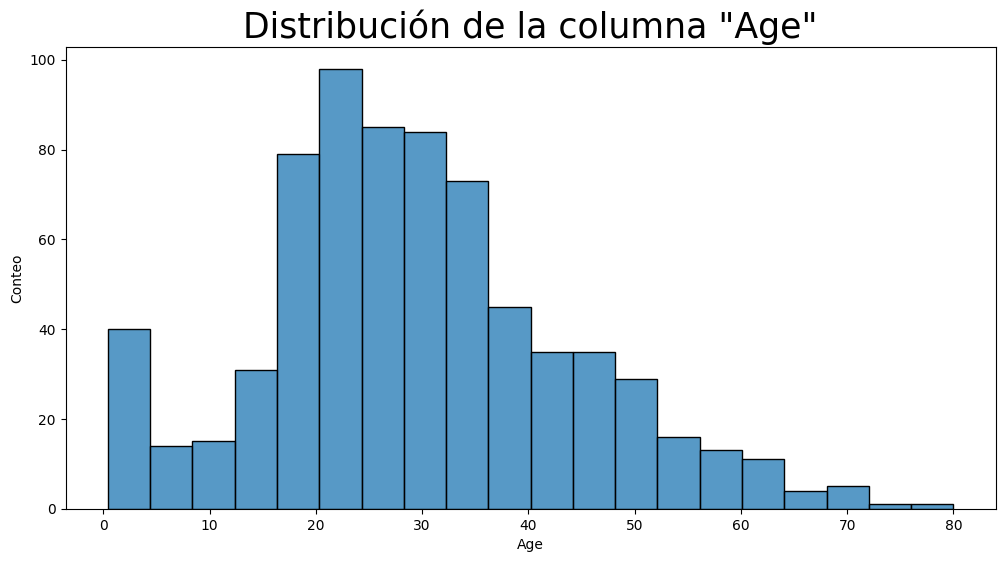

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'])
plt.title('Distribución de la columna "Age"', size=25)
plt.ylabel('Conteo');

Aquí nos enfrentamos a un problema, y es que, si sustituimos los valores faltantes de `Age` por la media o la mediana, podríamos deformar los datos por juntar demasiados en la media. Para un nivel introductorio está bien, pero quizá a un nivel más profesional podría ser interesante intentar predecir los valores de estas edades faltantes según ciertas características de los pasajeros, como las tarifas.

#### Sustituir por la mediana

In [45]:
df_Age_median = df.copy() # Creamos una copia de df en el que vamos a sustituir los valores faltantes de Age por la mediana
df_Age_median["Age"] = df_Age_median["Age"].fillna(df_Age_median["Age"].median())

In [46]:
df_Age_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Sustituir con KNN

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
# Cargamos los datos
df_Age_knn = pd.read_csv('titanic.csv')

In [49]:
# Creamos la columna lastname para guardar el apellido de los pasajeros
df_Age_knn['LastName'] = df_Age_knn['Name'].apply(lambda x: x.split(',')[0])

In [50]:
# Vamos a normalizar Fare para asegurarnos que no tenga un impacto desproporcionado en la distancia 
scaler = StandardScaler()
df_Age_knn['Fare'] = scaler.fit_transform(df_Age_knn[['Fare']])

In [51]:
# estas son las columnas que se van a usar como predictores de Age
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] #la edad tiene que tenerse en cuenta al predecir, los apellidos es una variable muy random y ruidosa para introducirse

# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_Age_knn[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)

In [52]:
# Creamos dos dataframes basados en la presencia o ausencia de Age
df_encoded['Age'] = df_Age_knn['Age']
df_with_age = df_encoded.dropna(subset=['Age'])
df_without_age = df_encoded[df_encoded['Age'].isna()].drop(columns='Age')

In [53]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_with_age.drop(columns='Age'), df_with_age['Age'], test_size=0.2, random_state=357)

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


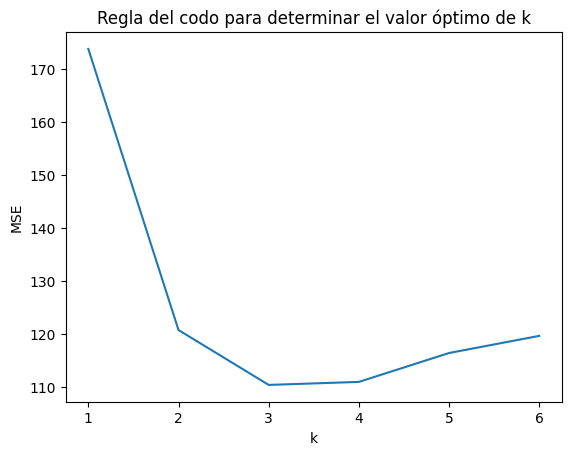

In [54]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """ estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
        Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    

# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()

# Graficamos 

In [55]:
# Determinar el mejor valor de k
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [56]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(df_without_age)
df_Age_knn.loc[df_Age_knn['Age'].isna(), 'Age'] = imputed_ages

In [57]:
df["Age"][610:620] # Columna Age original

610    39.0
611     NaN
612     NaN
613     NaN
614    35.0
615    24.0
616    34.0
617    26.0
618     4.0
619    26.0
Name: Age, dtype: float64

In [58]:
df_Age_median["Age"][610:620] # Sustitución por la mediana

610    39.0
611    28.0
612    28.0
613    28.0
614    35.0
615    24.0
616    34.0
617    26.0
618     4.0
619    26.0
Name: Age, dtype: float64

In [59]:
df_Age_knn["Age"][610:620] # Sustitucion por KNN con k=3 para el rango (1,7)

610    39.000000
611    26.666667
612    21.666667
613    34.333333
614    35.000000
615    24.000000
616    34.000000
617    26.000000
618     4.000000
619    26.000000
Name: Age, dtype: float64

In [60]:
df_Age_knn["Fare"].describe() # La variable Fare está normalizada

count    8.910000e+02
mean     3.987333e-18
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare, dtype: float64

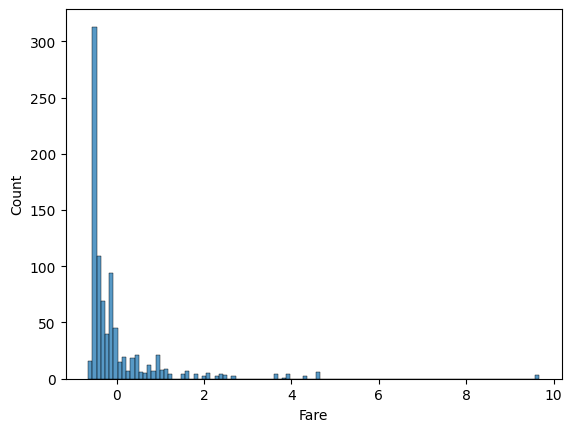

In [64]:
fare_knn = sns.histplot(df_Age_knn['Fare'])

In [61]:
df_Age_knn.describe() # Estadísticas de las variables numéricas del dataset con la transformación KNN...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.664523,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,13.587806,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,28.166667,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,9.667167e+00


In [62]:
df_Age_median.describe() # ... y con la transformación de la mediana (solo cambian Fare y Age)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
df.describe() # Sin transformación. Tiene las mismas estadísticas en Fare que df_Age_median, pero no en Age.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como se puede ver todas las estadísticas son iguales para todos los df salvo en Fare, así que vamos a estar trabajando con df_Age_Knn, corrigiendo primero esa columna, que se normalizó para no perturbar los datos estimados. 

Por curiosidad, aquí también se puede ver la ratio de supervivencia de los pacientes. Al ser `Survived` una variable que puede tomar el valor 0 si el pasajero no sobrevivió o 1 si sí sobrevivió, el promedio de la columna (no supervivientes x 0 + sí supervivientes * 1 entre número pasajeros) es la ratio de supervivencia. 

En esta base de datos, con 891 pasajeros, la ratio es del 38,4%, por lo que podemos deducir que la variable binaria está bien definida, pues es bastante cercano a la ratio de supervivencia [del total de la tripulación](https://es.wikipedia.org/wiki/Anexo:Pasajeros_a_bordo_del_RMS_Titanic#:~:text=Esta%20es%20una%20lista%20de,(contando%20pasajeros%20y%20tripulación).). En ese enlace, además, podemos hacer una búsqueda para verificar que, por ejemplo, el hombre con el ID número 31, que también sale en nuestro csv, falleció, por lo que confirmamos que dicha variable está catalogada de esa manera, aunque el consenso suele ser que el valor 1 es la afirmación de lo que se mide (en este caso, el nombre de la columna), nunca está de más intentar confirmarlo.

In [73]:
df2 = df_Age_knn.copy()  # Renombramos el dataframe para resumir el nombre.
df2 = pd.DataFrame(df2)  # Convertimos el dataframe en un objeto de tipo DataFrame.
df2["Fare"] = df["Fare"] # Deshacemos la normalización retornando los valores originales de la tarifa.

<Axes: xlabel='Fare', ylabel='Count'>

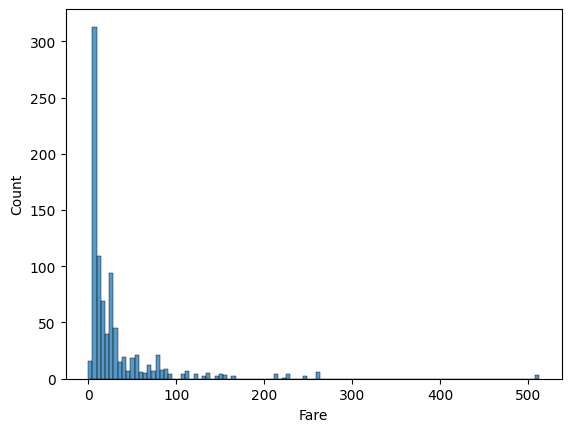

In [83]:
sns.histplot(df2['Fare'])

Por comodidad, vamos a pasar los valores de libras de 1912 a euros. Como se puede consultar [en este enlace](https://www.bankofengland.co.uk/monetary-policy/inflation/inflation-calculator?number.Sections%5B0%5D.Fields%5B0%5D.Value=1&current_year=1.39875039208645&comparison_year=133.472), según el Banco de Inglaterra, la inflación acumulada desde 1912 es tal que ha multiplicado los precios por, aproximadamente, 95,42231463 (este dato se consiguió pasando 1 millón de libras de 1912 a libras de abril de 2024, para obtener gran cantidad de decimales para ganar precisión). Además, el tipo de cambio Libra/Euro oficial a 30 de abril de 2024, que puede consultarse [en este otro enlace](https://www.bankofengland.co.uk/boeapps/database/Rates.asp?TD=30&TM=Apr&TY=2024&into=EUR&rateview=A), también del Banco de Inglaterra, fue de 0,8539 libras por cada euro. Es decir, que el tipo de cambio Euro/Libra fue de 1/0,8539 = 1,1711 euros por cada libra.

En definitiva, crearemos una columna nueva en la que multiplicamos la Tarifa original por la inflación acumulada desde 1912 hasta abril de 2024, y después aplicaremos el tipo de cambio oficial para obtener los precios en euros y entenderlos mejor.

In [95]:
df2["Euro_Fare"] = df2["Fare"] * 95.42231463 * 1.1711 # Convertimos la tarifa a libras de abril del 2024, y de libras de abril 2024 a euros de abril 2024

In [101]:
df2["Euro_Fare"].describe() # Estadísticas de la tarifa en euros

count      891.000000
mean      3598.790376
std       5553.194563
min          0.000000
25%        883.979864
50%       1615.243446
75%       3464.221253
max      57252.312998
Name: Euro_Fare, dtype: float64

Aclaración: al multiplicar todos los valores de Fare por la misma constante, no estamos alterando la distribución de los datos, simplemente se mueven en una escala distinta. Por lo tanto, los maximos y minimos de Euro Fare son los que correspondían con los maximos y minimos de Fare antes de aplicar las operaciones.

### Embarked

En este caso, como solo faltan 2 datos, podemos asignarles la moda

In [65]:
df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)
df2["Embarked"].value_counts()

C:\Users\juanv\AppData\Local\Temp\ipykernel_13616\2693916219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Cabin

In [74]:
df2["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [67]:
df2["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [68]:
df2["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Al faltar el 77% de los datos, no sería muy recomendable rellenar la información que queda con la que tenemos disponible. Además, al no ser una variable que tome pocos valores, tampoco se puede sustituir por la moda, pues el valor más repetido (que son 3 valores distintos) se repite unas 4 veces. Por lo tanto, tenemos 3 alternativas:

1. En caso de que la variable NO sea importante, considerar eliminar la columna.

2. En caso de que la variable sí sea importante:

    i. Transformar la variable `Cabin` en una variable binaria que tome dos valores: 0 si NO se conocía el valor de la variable, o 1 si SÍ se conocía su valor, y/o...

    ii. Dejar la variable tal y como está.

Por ahora, podemos dejar la variable `Cabin` inalterada, añadiendo una columna más con los datos con la transformación binaria.

In [78]:
df2["Cabin"].isnull() # Los True y False, son reemplazados...

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [82]:
df2["Binary_Cabin"] = [0 if pd.isnull(i) else 1 for i in df2["Cabin"]] # ... por 0 y 1, respectivamente
df2["Binary_Cabin"]

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Binary_Cabin, Length: 891, dtype: int64

In [100]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Binary_Cabin,Euro_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,0,810.180777
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1,7965.842671
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,0,885.611401
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,1,5933.875758
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,0,899.580035


## Análisis de los datos

Comenzamos

Tarifas (Fare) más altas y más bajas

In [99]:
tarifa_maxima_libras = round(df2["Fare"].max(), 2) # Tarifa máxima en libras de 1912, redondeado a 2 decimales
tarifa_minima_libras = round(df2["Fare"].min(), 2) # Tarifa mínima en libras de 1912 --
tarifa_maxima_euros = round(df2["Euro_Fare"].max(), 2) # Tarifa máxima en euros de abril de 2024 --
tarifa_minima_euros = round(df2["Euro_Fare"].min(), 2) # Tarifa mínima en euros de abril de 2024 --
print(f"El pasajero que menos pagó tuvo una tarifa de {tarifa_minima_libras} libras de 1912, equivalente a {tarifa_minima_euros} euros de abril de 2024, y la tarifa más cara fue de {tarifa_maxima_libras} libras de 1912, equivalente a {tarifa_maxima_euros} euros de abril de 2024.")

El pasajero que menos pagó tuvo una tarifa de 0.0 libras de 1912, equivalente a 0.0 euros de abril de 2024, y la tarifa más cara fue de 512.33 libras de 1912, equivalente a 57252.31 euros de abril de 2024.


Edad mínima y máxima

In [94]:
display(df2["Age"].sort_values().unique()) # Veamos, de nuevo, las edades ordenadas.
edad_maxima = df2["Age"].max() # Obtenemos la edad máxima.
edad_minima = df2["Age"].min() # Obtenemos la edad mínima.
if edad_minima < 1: # Si la edad mínima es menor a 1 año, mostraremos la edad del recién nacido en meses y la máxima en años
    print(f"El pasajero más joven era un pequeño bebé de {(edad_minima*12)//1} meses, y el de más edad tenía {edad_maxima//1} años.")
else: # Si la edad mínima es mayor a 1 año, mostraremos todas las edades en años
    print(f"El pasajero más joven tenía {edad_minima//1} años, y el de más edad tenía {edad_maxima//1} años.")


array([ 0.42      ,  0.67      ,  0.75      ,  0.83      ,  0.92      ,
        1.        ,  2.        ,  3.        ,  4.        ,  4.33333333,
        5.        ,  6.        ,  7.        ,  7.80666667,  8.        ,
        9.        ,  9.80666667, 10.        , 11.        , 12.        ,
       13.        , 14.        , 14.5       , 15.        , 16.        ,
       17.        , 18.        , 18.66666667, 19.        , 19.5       ,
       19.66666667, 20.        , 20.5       , 21.        , 21.66666667,
       22.        , 22.5       , 22.66666667, 23.        , 23.33333333,
       23.5       , 24.        , 24.5       , 24.66666667, 24.83333333,
       25.        , 25.16666667, 25.33333333, 25.5       , 25.66666667,
       26.        , 26.16666667, 26.33333333, 26.66666667, 26.83333333,
       27.        , 27.33333333, 28.        , 28.16666667, 28.5       ,
       28.66666667, 29.        , 29.16666667, 29.5       , 29.83333333,
       30.        , 30.5       , 31.        , 31.33333333, 32.  

El pasajero más joven era un pequeño bebé de 5.0 meses, y el de más edad tenía 80.0 años.


Número de pasajeros embarcados

In [118]:
fig1 = px.pie(df2, values = df2["Embarked"].value_counts().values, template = "plotly_dark", title = "Número total y relativo de pasajeros embarcados", width = 600, height = 400, names = df2["Embarked"].value_counts().index)
fig1.update_traces(textinfo = "value + percent")

Número de pasajeros embarcados

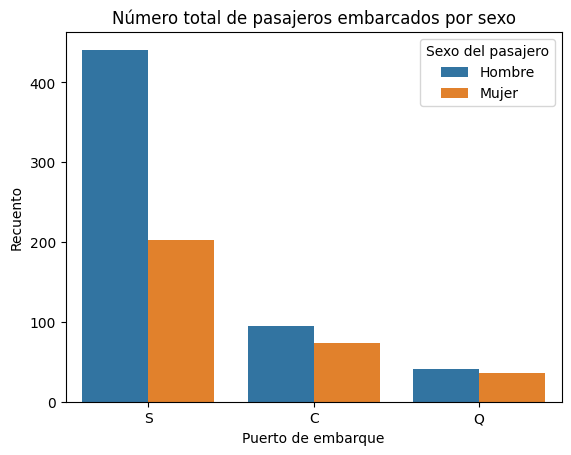

In [197]:
fig2 = sns.countplot(x='Embarked', hue='Sex', data=df2)
fig2.set_title('Número total de pasajeros embarcados por sexo')
fig2.set_ylabel('Recuento')
fig2.set_xlabel('Puerto de embarque') # Significa esto de verdad?
fig2.legend(title='Sexo del pasajero', labels=['Hombre', 'Mujer'])
fig2;

Número de supervivientes

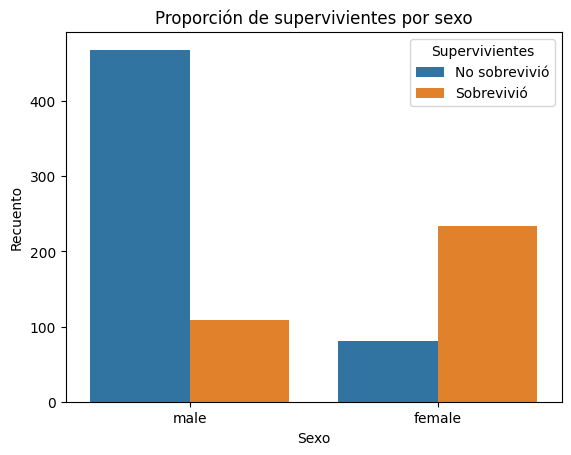

In [196]:
fig3 = sns.countplot(x="Sex", hue="Survived", data=df2)
fig3.set_title('Proporción de supervivientes por sexo')
fig3.set_ylabel('Recuento')
fig3.set_xlabel('Sexo')
fig3.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig3;

Agrupamos los pasajeros según su edad

In [151]:
def age_group(age):
    if age < 10:
        return 'Kid'
    elif 10 <= age < 18:
        return 'Teen'
    elif 18 <= age <= 45:
        return 'Adult'
    else:
        return 'Third age'

df2['AgeGroup'] = df2['Age'].apply(age_group)

Número de supervivientes según la edad y sexo

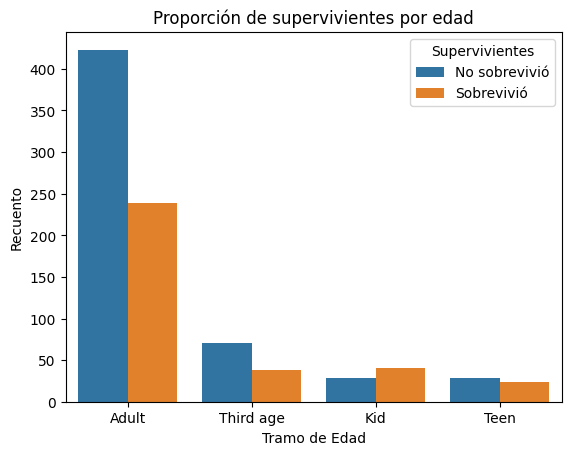

In [195]:
fig4 = sns.countplot(x="AgeGroup", hue="Survived", data=df2)
fig4.set_title('Proporción de supervivientes por edad')
fig4.set_ylabel('Recuento')
fig4.set_xlabel('Tramo de Edad')
fig4.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig4;

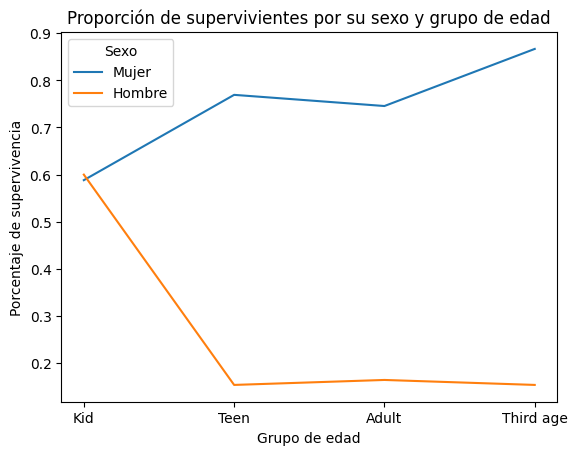

In [237]:
age_mapping = {"Kid": 0, "Teen": 1, "Adult": 2, "Third_age": 3}
df2['AgeGroupOrder'] = df2['AgeGroup'].map(age_mapping)
df2 = df2.sort_values('AgeGroupOrder')

figura5 = sns.lineplot(data=df2, x = df2["AgeGroup"], y = df2["Survived"], hue=df2["Sex"], errorbar=None)
figura5.set_title('Proporción de supervivientes por su sexo y grupo de edad')
figura5.set_ylabel('Porcentaje de supervivencia')
figura5.set_xlabel('Grupo de edad')
figura5.legend(title='Sexo', labels=['Mujer', 'Hombre'])
figura5;

df2 = df2.drop(columns='AgeGroupOrder')

Número de supervivientes según su clase y sexo

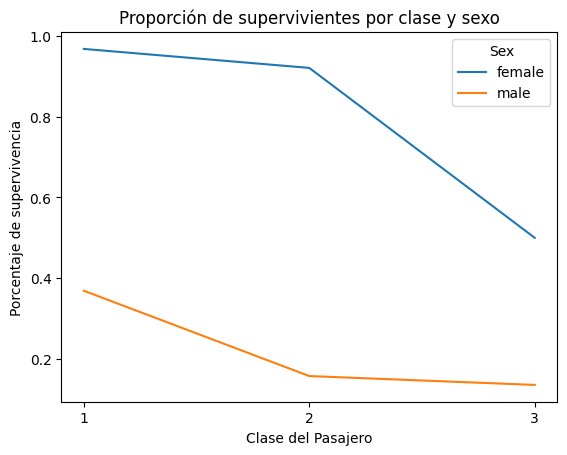

In [238]:
fig6 = sns.lineplot(data=df2, x = df2["Pclass"], y = df2["Survived"], hue=df2["Sex"], errorbar=None)
fig6.set_title('Proporción de supervivientes por clase y sexo')
fig6.set_ylabel('Porcentaje de supervivencia')
fig6.set_xlabel('Clase del Pasajero')
fig6.set_xticks([1, 2, 3]);

Número de supervivientes según su edad y clase

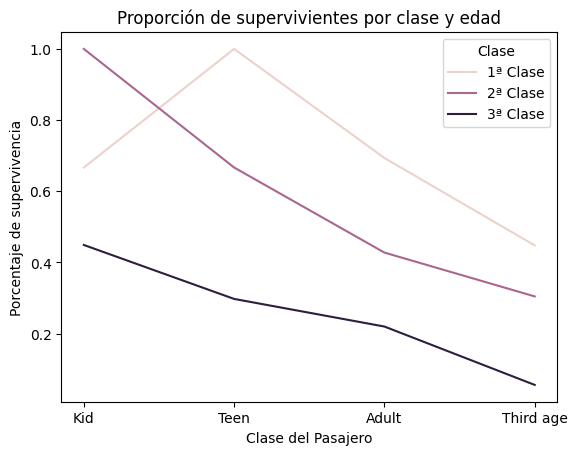

In [240]:
fig6 = sns.lineplot(data=df2, x = df2["AgeGroup"], y = df2["Survived"], hue=df2["Pclass"], errorbar=None)
fig6.set_title('Proporción de supervivientes por clase y edad')
fig6.set_ylabel('Porcentaje de supervivencia')
fig6.set_xlabel('Clase del Pasajero')
fig6.legend(title='Clase', labels=['1ª Clase', '2ª Clase', '3ª Clase']);